# Metabolites RCC Cancer Stages Clustering

Author: Olatomiwa Bifarin<br>
Department of Biochemistry and Molecular Biology<br>
University of Georgia<br>
Edison Lab<br>

Last edited: 04DEC2019 

_This is a static version of a Jupyter notebook, and work (documentation) is still in progress_ 

**Goal**: 

### Notebook Outline

1. [Load Data/Feature Selection](#1)
2. [Plot Dendograms](#2)

In [ ]:
import statlib
>>> print statlib.__version__

In [2]:
#import python packages and libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style
import math
import scipy
from scipy import stats
import statsmodels as sms
from statsmodels.stats import multitest
from scipy.stats import shapiro

#For Seaborn plots
import seaborn as sns; sns.set(style='white')

#To ignore warning
import warnings
warnings.filterwarnings('ignore')

# More sharp and legible graphics
%config InlineBackend.figure_format = 'retina'

# Set seaborn figure labels to 'talk', to be more visible. 
sns.set_context('paper')

_Plotly Libraries_

In [3]:
import plotly as py
import plotly.graph_objs as go

import networkx as nx

py.offline.init_notebook_mode(connected=True)

## 1. Load Data / Feature Selection
<a id="1"></a>

`MLfeatures` are features selected by fold change and t-test filtering in this notebook. `RFE_MLfeatures` was uploaded, and the features were selected from 2 fold changes, t-test p<0.05, in addition to RF-RFECV. Be sure to chose the appropriate inputs for `sRCC` and `smRCC`.

In [4]:
RFE_MLfeatures = pd.read_excel('RCCdata/MLfeatures_40StagePredictor.xlsx')

## 2. Plot Dendograms
<a id="2"></a>

___Set up HCA Clusters___

In [6]:
df = pd.read_excel('data/combinedNMRMS_DuplicatesRemoved.xlsx')
df.drop(['MS_ID'], axis=1, inplace=True)
dfRCC = pd.read_excel('RCCdata/RCC_MetaData_01JUL2019.xlsx')

dfRCC = dfRCC.filter(['Sample_ID', 'Metastatic', 'SubTypes', 
                      'Nuclear Grade', 'Grade', 'Tstage', 
                      'Tstage Group', 'Nstage', 'Mstage', 
                      'Stage', 'Grouped Stage','Tumor Width'], axis=1)

RCCdataframe = pd.merge(df, dfRCC, on='Sample_ID') # Merge the two dataframe on Sample ID

In [7]:
# index of grouped stage in RCCdataframe
stage_loc = RCCdataframe.columns.get_loc("Stage") 
# marker is the dataframe for our boxplot
sRCC = RCCdataframe.iloc[:, stage_loc].to_frame().join(RFE_MLfeatures).dropna()

In [8]:
sRCC.head()

,Stage,4116,6912,248,4-Guanidinobutanoate,5087,2313,1536,7001,5379,...,5420,6952,3093,3370,5898,6980,3405,6994,Coumarin,4992
0,1.0,-0.361192,-0.046419,-0.080780,-0.041930,-0.511155,-0.701577,-0.023649,1.374757,1.612282,...,-0.548525,-0.242347,-0.766826,-0.627737,-0.533164,-0.120953,0.665469,-0.237698,0.427669,-0.501679
7,2.0,-0.183863,-0.433287,-0.529760,1.203678,-0.188862,-0.124713,-0.364514,-0.737920,-0.701059,...,-0.022791,-0.241971,0.916776,-0.626818,-0.456342,0.044520,-0.271758,-0.236631,-0.290184,-0.015318
8,4.0,-0.716685,-0.747206,-0.536666,-0.368887,-0.496488,0.167831,-0.452046,-0.383390,-0.032353,...,-0.161990,-0.240362,0.297798,-0.625924,-0.456247,-0.247706,-0.666052,-0.235368,-0.286676,1.991044
9,1.0,-0.483315,-0.414518,-0.515254,0.457330,-0.519461,-0.977239,-0.102848,-0.918390,-0.741974,...,-0.547068,-0.243725,-0.814725,-0.625177,-0.555723,0.284578,-0.695203,-0.237766,-0.349675,-0.499516
10,1.0,0.693683,1.556351,-0.523502,2.267910,-0.478948,-0.157802,5.790984,-0.919091,-0.775003,...,2.538748,-0.238255,0.511055,1.190868,-0.335959,0.565419,5.874381,-0.234020,-0.338982,-0.381504


In [9]:
smRCC = sRCC.groupby(['Stage'])[RFE_MLfeatures.columns].mean()

In [10]:
smRCC

,4116,6912,248,4-Guanidinobutanoate,5087,2313,1536,7001,5379,6835,...,5420,6952,3093,3370,5898,6980,3405,6994,Coumarin,4992
Stage,,,,,,,,,,,,,,,,,,,,,
1.0,0.068946,0.113343,-0.370678,0.236457,-0.047618,-0.353406,0.409517,-0.335921,-0.285697,-0.210524,...,-0.305774,0.348673,-0.322566,0.119108,-0.259899,0.030149,0.361249,0.345770,0.142171,-0.192668
2.0,0.575408,0.468139,-0.199940,0.299634,0.911816,0.057160,-0.106126,-0.384870,-0.398472,-0.374261,...,-0.125283,-0.240193,0.047161,0.199209,-0.163921,-0.014182,-0.008680,-0.233490,0.683233,-0.233527
3.0,-0.471921,-0.492232,0.451764,-0.356053,-0.351082,0.827150,-0.383217,0.865691,0.738885,0.368467,...,0.733499,-0.227120,0.442717,-0.501790,0.713593,-0.281767,-0.319993,-0.235176,-0.275234,0.343573
4.0,-0.425209,-0.438843,0.482634,-0.493717,-0.316607,0.102515,-0.248862,0.224475,0.235276,0.595777,...,0.198163,-0.242183,0.475947,-0.094138,0.201446,-0.316062,-0.317624,-0.236688,-0.197702,0.580351


In [11]:
smtRCC = smRCC.T
smtRCC.head()

Stage,1.0,2.0,3.0,4.0
4116,0.068946,0.575408,-0.471921,-0.425209
6912,0.113343,0.468139,-0.492232,-0.438843
248,-0.370678,-0.199940,0.451764,0.482634
4-Guanidinobutanoate,0.236457,0.299634,-0.356053,-0.493717
5087,-0.047618,0.911816,-0.351082,-0.316607


In [12]:
smRCC.head()

,4116,6912,248,4-Guanidinobutanoate,5087,2313,1536,7001,5379,6835,...,5420,6952,3093,3370,5898,6980,3405,6994,Coumarin,4992
Stage,,,,,,,,,,,,,,,,,,,,,
1.0,0.068946,0.113343,-0.370678,0.236457,-0.047618,-0.353406,0.409517,-0.335921,-0.285697,-0.210524,...,-0.305774,0.348673,-0.322566,0.119108,-0.259899,0.030149,0.361249,0.345770,0.142171,-0.192668
2.0,0.575408,0.468139,-0.199940,0.299634,0.911816,0.057160,-0.106126,-0.384870,-0.398472,-0.374261,...,-0.125283,-0.240193,0.047161,0.199209,-0.163921,-0.014182,-0.008680,-0.233490,0.683233,-0.233527
3.0,-0.471921,-0.492232,0.451764,-0.356053,-0.351082,0.827150,-0.383217,0.865691,0.738885,0.368467,...,0.733499,-0.227120,0.442717,-0.501790,0.713593,-0.281767,-0.319993,-0.235176,-0.275234,0.343573
4.0,-0.425209,-0.438843,0.482634,-0.493717,-0.316607,0.102515,-0.248862,0.224475,0.235276,0.595777,...,0.198163,-0.242183,0.475947,-0.094138,0.201446,-0.316062,-0.317624,-0.236688,-0.197702,0.580351


In [13]:
smtRCC.head()

Stage,1.0,2.0,3.0,4.0
4116,0.068946,0.575408,-0.471921,-0.425209
6912,0.113343,0.468139,-0.492232,-0.438843
248,-0.370678,-0.199940,0.451764,0.482634
4-Guanidinobutanoate,0.236457,0.299634,-0.356053,-0.493717
5087,-0.047618,0.911816,-0.351082,-0.316607


In [14]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import scipy.cluster.hierarchy as hac

import plotly.figure_factory as ff

In [15]:
c_dist = pdist(smtRCC) # computing the distance
c_link = linkage(smtRCC,  metric='correlation', method='complete')# computing the linkage

### 3a. Plotly Heatmap Dendograms

In [18]:
# Initialize figure by creating upper dendrogram
fig = ff.create_dendrogram(c_link, orientation='bottom', labels=RFE_MLfeatures.columns)
for i in range(len(fig['data'])):
    fig['data'][i]['yaxis'] = 'y2'

In [19]:
# Create Side Dendrogram
dendro_side = ff.create_dendrogram(c_link, orientation='right')
for i in range(len(dendro_side['data'])):
    dendro_side['data'][i]['xaxis'] = 'x2'

In [20]:
# Add Side Dendrogram Data to Figure
for data in dendro_side['data']:
    fig.add_trace(data)

In [21]:
# Create Heatmap
dendro_leaves = dendro_side['layout']['yaxis']['ticktext']
dendro_leaves = list(map(int, dendro_leaves))
data_dist = pdist(smtRCC)
heat_data = squareform(data_dist)
heat_data = heat_data[dendro_leaves,:]
heat_data = heat_data[:,dendro_leaves]

heatmap = [
    go.Heatmap(
        x = dendro_leaves,
        y = dendro_leaves,
        z = heat_data,
        colorscale = 'Blues'
    )
]

heatmap[0]['x'] = fig['layout']['xaxis']['tickvals']
heatmap[0]['y'] = dendro_side['layout']['yaxis']['tickvals']

# Add Heatmap Data to Figure
for data in heatmap:
    fig.add_trace(data)

# Edit Layout
fig.layout.update({'width':800, 'height':800,
                         'showlegend':False, 'hovermode': 'closest',
                         })
# Edit xaxis
fig.layout.update(xaxis={'domain': [.15, 1],
                                  'mirror': False,
                                  'showgrid': False,
                                  'showline': False,
                                  'zeroline': False,
                                  'ticks':""})
# Edit xaxis2
fig.layout.update(xaxis2={'domain': [0, .15],
                                   'mirror': False,
                                   'showgrid': False,
                                   'showline': False,
                                   'zeroline': False,
                                   'showticklabels': False,
                                   'ticks':""})

# Edit yaxis
fig.layout.update(yaxis={'domain': [0, .85],
                                  'mirror': False,
                                  'showgrid': False,
                                  'showline': False,
                                  'zeroline': False,
                                  'showticklabels': False,
                                  'ticks': ""
                        })
# Edit yaxis2
fig.layout.update(yaxis2={'domain':[.825, .975],
                                   'mirror': False,
                                   'showgrid': False,
                                   'showline': False,
                                   'zeroline': False,
                                   'showticklabels': False,
                                   'ticks':""})

# Plot!
#fig.show()
py.offline.iplot(fig)

### 3b. Radial Dendograms

### 3c. Traditional Dendograms

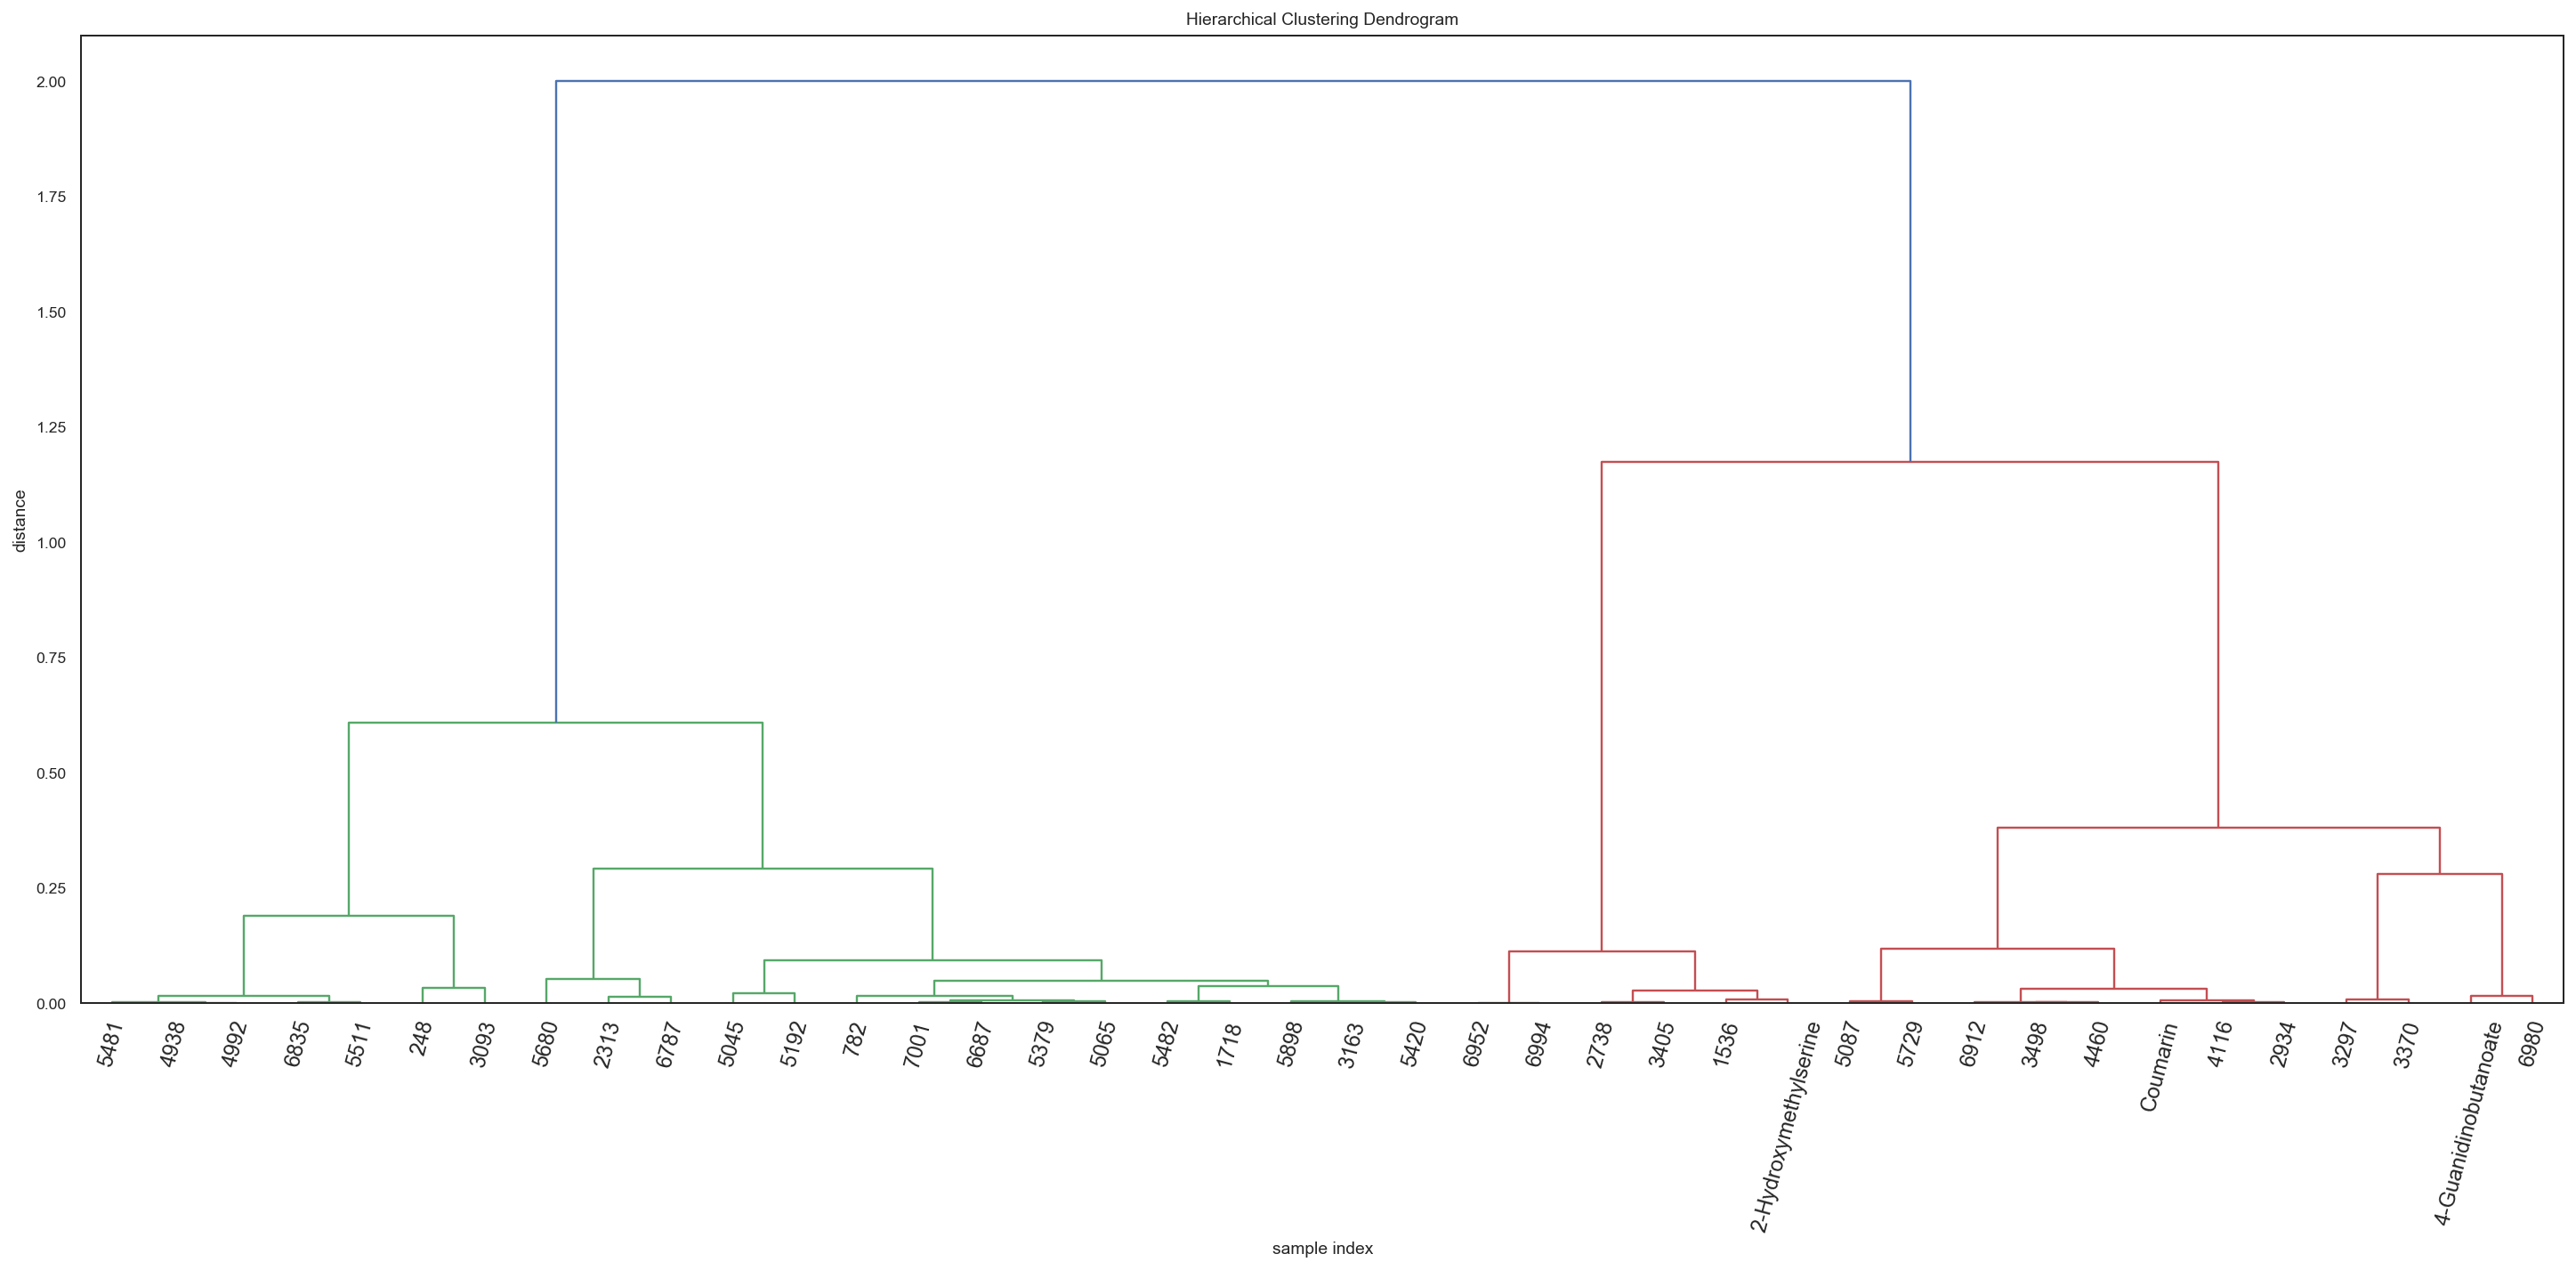

In [26]:
# Plot dendogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    c_link,
    labels=RFE_MLfeatures.columns,
    leaf_rotation=75.,  # rotates the x axis labels
    leaf_font_size=12,  # font size for the x axis labels
)
#plt.savefig('AUCplots.svg', dpi=300)
plt.show()

### 3d. Retrieve Cluster

Cluster 5 number of entries 8


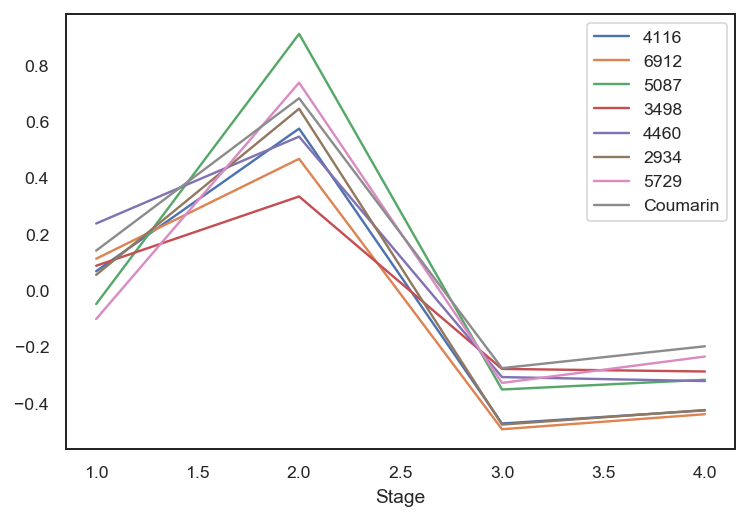

Cluster 1 number of entries 7


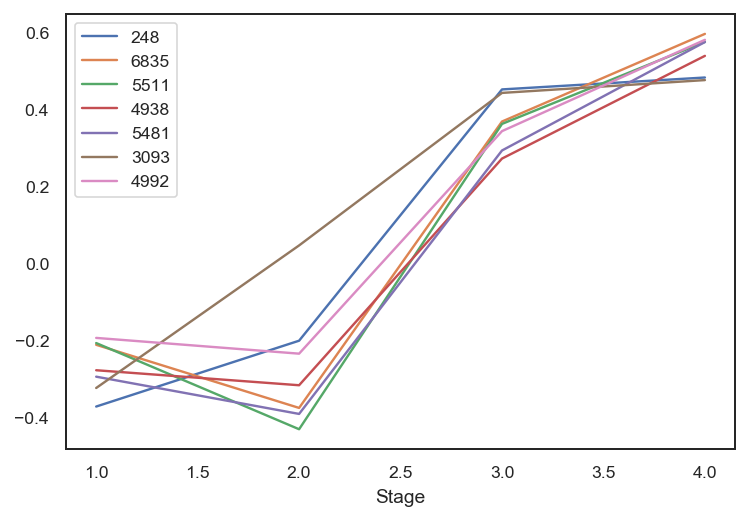

Cluster 6 number of entries 4


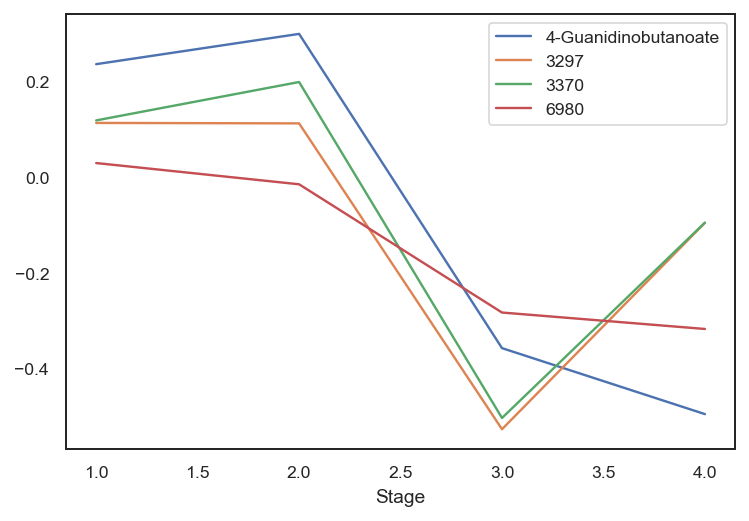

Cluster 2 number of entries 3


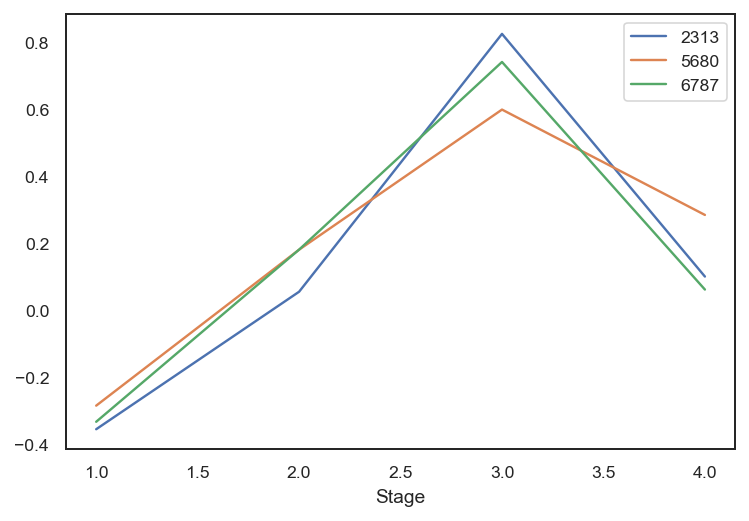

Cluster 4 number of entries 6


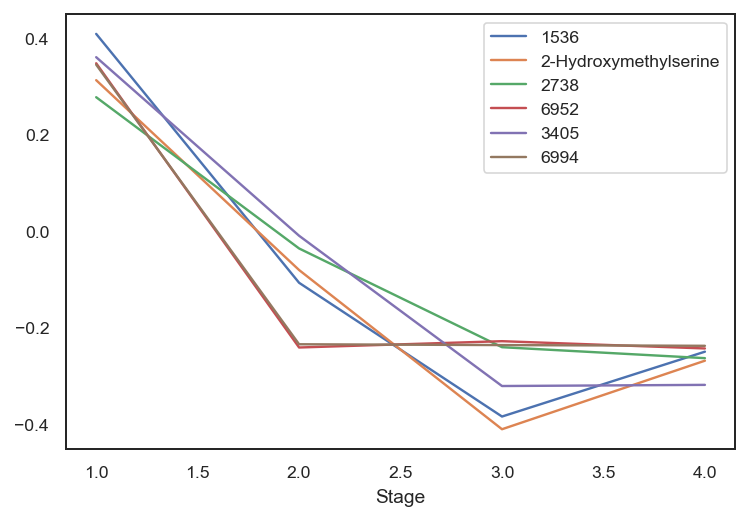

Cluster 3 number of entries 12


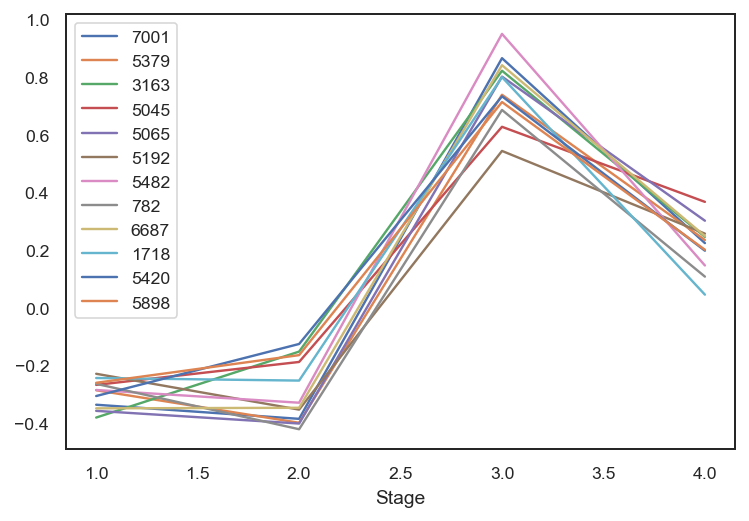

In [24]:
from scipy.cluster.hierarchy import fcluster

def print_clusters(smtRCC, Z, k, plot=False):
    # k Number of clusters I'd like to extract
    results = fcluster(Z, k, criterion='maxclust')

    # check the results
    s = pd.Series(results)
    clusters = s.unique()

    for c in clusters:
        cluster_indeces = s[s==c].index
        print("Cluster %d number of entries %d" % (c, len(cluster_indeces)))
        if plot:
            smtRCC.T.iloc[:,cluster_indeces].plot()
            plt.show()

print_clusters(smtRCC, c_link, 6, plot=True)